In [1]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

In [3]:
# process data
jeopardy_df = pd.read_csv('JEOPARDY_CSV.csv')
jeopardy_df = jeopardy_df.rename(columns={' Question': 'Question', ' Answer': 'Answer', ' Category': 'Category', " Air Date": "Air Date"})
jeopardy_df.drop(jeopardy_df.index[[94817, 143297]], inplace=True)

mask = jeopardy_df['Question'].str.contains("<")
jeopardy_df = jeopardy_df[~mask]

# combine ' Question' column and ' Answer' column
jeopardy_df['Document'] = jeopardy_df['Question'] + " " + jeopardy_df['Answer']

# # change date to year only
jeopardy_df['Air Date'] = jeopardy_df['Air Date'].str[:4]

top10 = jeopardy_df['Answer'].value_counts()[:10]

mask = jeopardy_df['Answer'].map(lambda x: x in top10.index.tolist())

mask1 = jeopardy_df[jeopardy_df['Question'] == ('[audio clue]')]
mask2 = jeopardy_df[jeopardy_df['Question'] == ('[video clue]')]
mask3 = jeopardy_df[jeopardy_df['Question'] == ('[filler]')]
mask4 = jeopardy_df[jeopardy_df['Question'] == ('(audio clue)')]

jeopardy_df.drop(mask1.index, inplace = True) 
jeopardy_df.drop(mask2.index, inplace = True)
jeopardy_df.drop(mask3.index, inplace = True)
jeopardy_df.drop(mask4.index, inplace = True)

In [ ]:
!python -m spacy download en_core_web_lg

In [8]:
nlp_web = spacy.load("en_core_web_lg")

In [10]:
ner_results = []

for document in jeopardy_df['Document']:
    text = str(document)
    doc_web = nlp_web(text)
    ner_results.append(doc_web.ents)

jeopardy_df['ner_results'] = ner_results

In [137]:
# most common spans
all_ent_counts = {}
org_counts = {} # labels[0]
person_counts = {} # labels[1]
gpe_counts = {} # labels[2]
event_counts = {} # labels[3]
art_counts = {} # labels[4]

labels = ['ORG', 'PERSON', 'GPE', 'EVENT', 'WORK_OF_ART']

for ner_result in jeopardy_df['ner_results']:
    for ent in ner_result:
        if ent.label_ in labels:
            # all counts
            if ent.text not in all_ent_counts:
                all_ent_counts[ent.text] = 0
        
            all_ent_counts[ent.text] += 1

            # org
            if ent.label_ == labels[0]:
                if ent.text not in org_counts:
                    org_counts[ent.text] = 0
                org_counts[ent.text] += 1
            
            # person
            if ent.label_ == labels[1]:
                if ent.text not in person_counts:
                    person_counts[ent.text] = 0
                person_counts[ent.text] += 1

            # gpe
            if ent.label_ == labels[2]:
                if ent.text not in gpe_counts:
                    gpe_counts[ent.text] = 0
                gpe_counts[ent.text] += 1

            # event
            if ent.label_ == labels[3]:
                if ent.text not in event_counts:
                    event_counts[ent.text] = 0
                event_counts[ent.text] += 1

            # work of art
            if ent.label_ == labels[4]:
                if ent.text not in art_counts:
                    art_counts[ent.text] = 0
                art_counts[ent.text] += 1

            

In [170]:
# total entity spans: 148670
# just org, person, gpe, event, work of art entities: 114575
# percentage: 77.07%

# all: 114575
# org: 37886
# person: 46331
# gpe: 8183
# event: 2075
# work of art: 25080

In [ ]:
pip install wordcloud

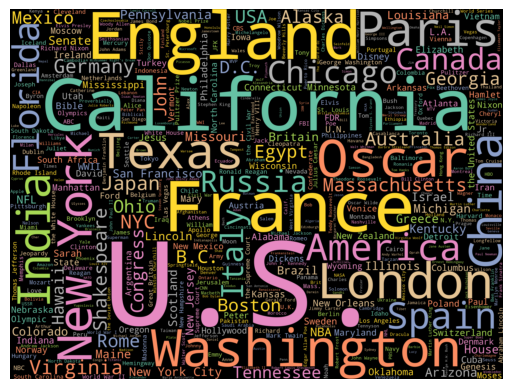

In [186]:
# ALL ENTITIES (FROM 5 TYPES)

# source: https://stackoverflow.com/questions/38465478/wordcloud-from-data-frame-with-frequency-python/43108642#43108642
from wordcloud import WordCloud

all_wordcloud = WordCloud(width=4000, height=3000, max_words=500, background_color='black', colormap='Set2')
all_wordcloud.generate_from_frequencies(frequencies=all_ent_counts)
plt.figure()
plt.imshow(all_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

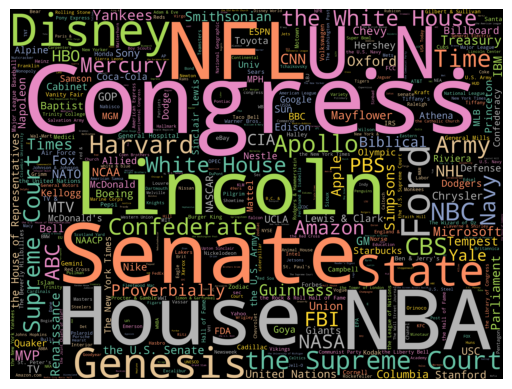

In [187]:
# ENTITY TYPE: ORG
org_wordcloud = WordCloud(width=4000, height=3000, max_words=500, background_color='black', colormap='Set2')
org_wordcloud.generate_from_frequencies(frequencies=org_counts)
plt.figure()
plt.imshow(org_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

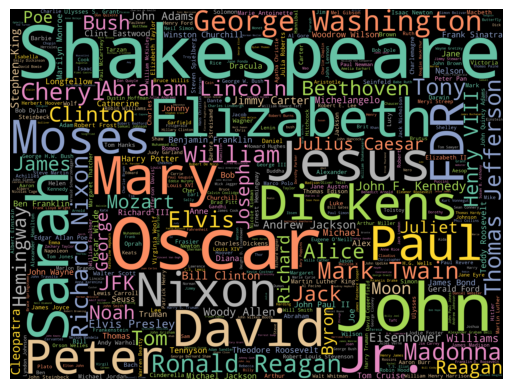

In [188]:
# ENTITY TYPE: PERSON
person_wordcloud = WordCloud(width=4000, height=3000, max_words=500, background_color='black', colormap='Set2')
person_wordcloud.generate_from_frequencies(frequencies=person_counts)
plt.figure()
plt.imshow(person_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

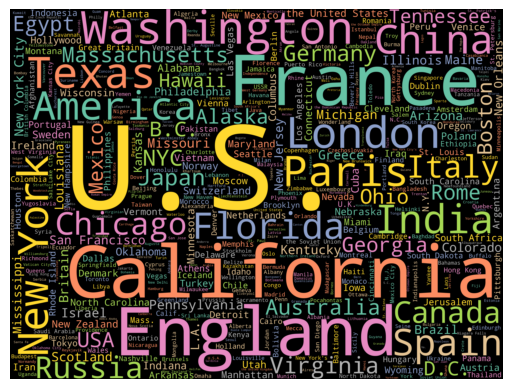

In [191]:
# ENTITY TYPE: GPE
gpe_wordcloud = WordCloud(width=4000, height=3000, max_words=500, background_color='black', colormap='Set2')
gpe_wordcloud.generate_from_frequencies(frequencies=gpe_counts)
plt.figure()
plt.imshow(gpe_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

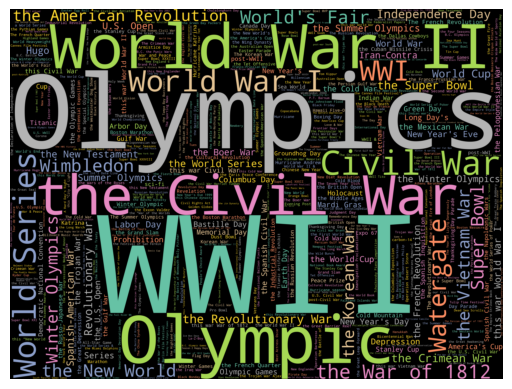

In [192]:
# ENTITY TYPE: EVENT
event_wordcloud = WordCloud(width=4000, height=3000, max_words=500, background_color='black', colormap='Set2')
event_wordcloud.generate_from_frequencies(frequencies=event_counts)
plt.figure()
plt.imshow(event_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

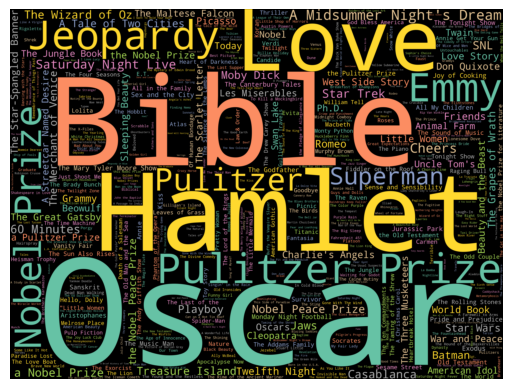

In [190]:
# ENTITY TYPE: WORK OF ART
work_of_art_wordcloud = WordCloud(width=4000, height=3000, max_words=500, background_color='black', colormap='Set2')
work_of_art_wordcloud.generate_from_frequencies(frequencies=art_counts)
plt.figure()
plt.imshow(work_of_art_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()